# Lasso graphique sur les données  avec les lamdas = aux val de $\Theta$

In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

In [ ]:
os.environ['K'] = str(5)
!jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
data = core.read_csv(os.path.join('results', 'data.csv'))
data

In [ ]:
!Rscript lasso1.R

In [ ]:
graphs = []
for filepath in os.listdir('.'):
    if filepath.startswith('lasso_'):
        adjmat = linalg.read_csv(filepath)
        graphs.append(pgm.UndirectedGraph(adjmat))
graphs = sorted(graphs, key = lambda graph: graph.nb_edges)

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 21.9 µs


<IPython.core.display.Javascript object>


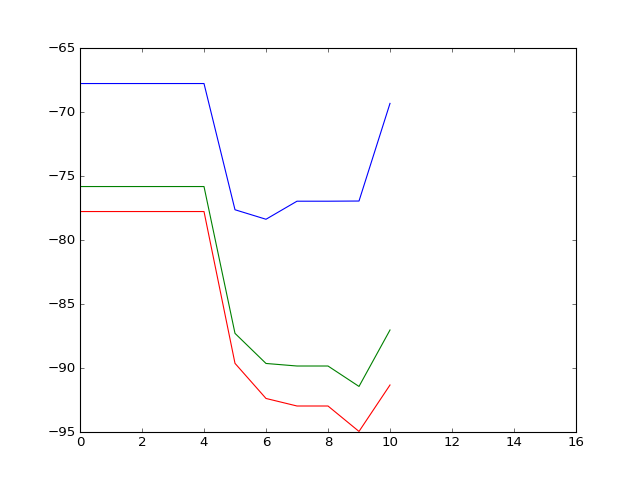

In [10]:
LLHs = []
BICs = []
AICs = []

%time
for graph in graphs:
    try:
        mle = pgm.graphical_gaussian_estimation(algo='scd',
                                                data=data,
                                                graph=graph)

        dist = mle.estimated.copy()

        LLHs.append(2 * dist.loglikelihood(data))
        
    except:
        LLHs.append(float("nan"))
    finally:
        
        BICs.append(LLHs[-1] - dist.nb_parameters * math.log(len(data.events)))
        AICs.append(LLHs[-1] - dist.nb_parameters * 2)

fig = pyplot.figure()
axes = fig.add_subplot(111)
axes.plot(LLHs)
axes.plot(BICs)
axes.plot(AICs)

In [8]:
aic = AICs.index(max(AICs))
bic = BICs.index(max(BICs))


<IPython.core.display.Javascript object>


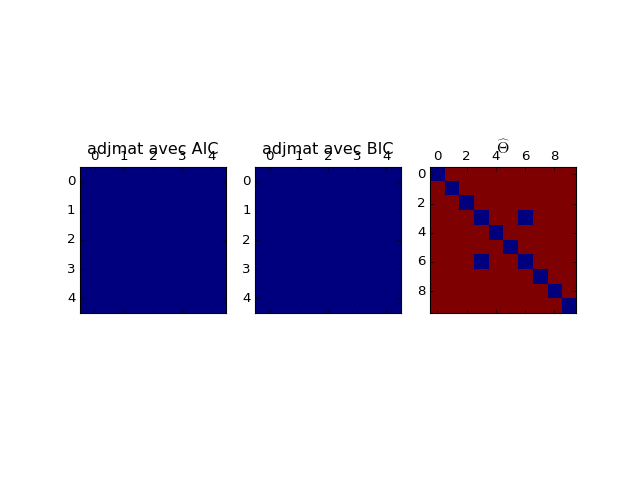

In [11]:
       
fig = pyplot.figure()
axes = graphs[aic].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC')
axes = graphs[bic].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC')
axes =  graph.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')

